<!-- Template 
Auteur: Olivier Pannekoucke
Date: 24/09/2018
Description: 
   Introduction aux notebook jupyter et à la création/valorisation d'un travail scientifique.
-->
<center>
<h1> Project Based Learning Climat : intro EOF </h1>
 O. Pannekoucke<br>
    INPT-ENM, CNRM, CERFACS<br>    
</center>

**Main goals**

* Background in dynamical system and representation of time evolution of the state
* Understanding between short term forecast and the climate of a system from Lorenz63 
* Introduction to modes decomposition for geophysical dynamics
* Presentation of EOF/PCA/Karhunen-Loève/.. basis for univariate/multivariate analysis of Global Circulation Model outputs


<h3 style="font-variant:small-caps;"><center>Abstract</center></h3>

<div style="margin:0 50px 0 50px">
<p style="background:rgb(230,230,255)">
This notebook introduces classical representation for the evolution of the state of a system (time serie, phase space), and explain how mode decomposition can be introduced for the spatial discretization of geophysical dynamics. Then the Empirical Orthogonal Functions (also called Principal Analysis Components or Karhunen-Lève basis or ..) are introduced to show how to build physically interesting modes of variability which leads to compress the information of large dataset. This is applied on a long period of 30 years of Global Circulation Model PUMA simulation where univariate and multivariate computation of EOFs are performed.</p>
<b>keywords</b>: <i> short term prediction, time series, phase space, climate of a geophysical system, modes decomposition, empirical modes decomposition, PUMA.
</i>
    
</div>

## **Introduction**

The exploration of geophysical flows is difficult because it is rare to have access to the representation of the state of the atmosphere or the ocean as a whole. Very often, we are reduced to study a system from its mathematical modeling, then its numerical resolution. 

But often the complexity of the equations does not allow the extraction of simple behaviors or synthetic quantities to understand the characteristics of the flow. Then, the numerical representation, often in very high dimension, also makes it difficult to explore the data.

The principal component analysis or Empirical Orthogonal Functions is a technique to reduce the dimension of the problem, which allows to facilitate the representation and analysis.

The objective of this Project Based Learning is to discover the problems encountered in the analysis of geophysical data, the notion of trajectory, the notion of climate, and how high-dimensional information can be simplified by decomposing the temporal evolution on the main modes of signal variability.

In a first step, Section 1, we come back to what is an evolution equation to illustrate the dynamics in the phase space. This representation allows us to discover the notion of climate, for example with the Lorenz attractor 1963/1980. Section 2 introduces the projection methods which are a way of spatially discretizing the partial differential equations encountered in geophysical fluids, and allowing to reduce to an ordinary differential equation. This way of decomposing the fields is then extended, in Section 3, in the case of random vectors for which the main variability modes are introduced, leading to the Empirical Orthogonal Functions deduced from the data. Section 4 illustrates these notions on data resulting from a long simulation with the PUMA general circulation model, where we explore the modes of variability of the geopotential, and then the modes of variability common to geopotential/temperature.


## **1. Background on Ordinary Differential Equations**
### **1.1 Introduction to dynamics system**

**Dynamical systems**

A dynamical system takes the form of a system of ordinary differential equations of order $1$, which reads as 
$$(1)\qquad\frac{d\mathbf{x} }{dt}=f(\mathbf{x}),$$
where $\mathbf{x}\in {\mathbb R}^n$ is a vector and $f:{\mathbb R}^n\rightarrow{\mathbb R}^n$ is a differential map, which can be seen as a vector field.

**An important property of Eq.(1) is that we expect there exists one and only one solution starting from a given initial condition $x(0)$.** A situation that occurs when $f$ is Lipschitzian *i.e.* there exists $K>0$ so that $||f(\mathbf{x})-f(\mathbf{y})||\leq ||\mathbf{x}-\mathbf{y}||$.

When there exists a martix $\mathbf{A}$ such that $f(\mathbf{x})=\mathbf{Ax}$ (that is the case where $f$ is a linear map), then the solution is known and is given by 
$$\mathbf{x}(t) = e^{\mathbf{A}t}\mathbf{x}(0),$$
when Eq.(1) is integrated from a time $t=0$ starting from $\mathbf{x}(0)$.

However, most of time, there is no analytical solution of Eq.(1) (think about non-linear dynamics), and numerical exploration is needed.

**Numerical integrations of ODE**

The temporal extrapolation problem amounts to determining the state $\mathbf{x}(t+\delta t)$ knowing the state $\mathbf{x}(t)$, for a given $\delta t$.

This expression is reminiscent of the use of the Taylor formula which can be written as 
$$(2)\qquad \mathbf{x}(t+\delta t)= \mathbf{x}(t) + \delta t \mathbf{x}^{(1)}(t) + \frac{\delta t^2}{2} \mathbf{x}^{(2)}(t)+\cdots +\frac{\delta t^k}{k!} \mathbf{x}^{(k)}(t)+o(\delta t^{k}),$$
where $\mathbf{x}^{(k)}(t)$ denotes the $k^\textrm{th}$ time derivative of the solution $x(t)$ evaluated at time $t$.

From Taylor's formula, we can deduce at leading order by focusing on order $\delta t$ that 
$$(3)\qquad \mathbf{x}(t+\delta t)\approx \mathbf{x}(t) + \delta t f(\mathbf{x}(t)),$$
where we used that $\mathbf{x}^{(1)}(t)=f(\mathbf{x}(t))$ from Eq.(2),
which suggests a recursive computational strategy in the form 
$$(4)\qquad \mathbf{y}_{q+1} = \mathbf{y}_q +\delta t f(\mathbf{y}_q),$$
where $\mathbf{y}_q$ is an approximation of $\mathbf{x}(t_q)$ with $\mathbf{y}_0=\mathbf{x}(0)$ and $t_q=q\delta t$. 

The recurrence relation Eq.(4) is known as the **Euler time scheme**. 

We will illustrate its implementation in the case of simple dynamics.

### **1.2 Illustration oscillateur (2D)**

**Differential system associated with the oscillator**

The dynamics of a harmonic oscillator can be written as 
$$(5)\qquad \ddot x +\omega^2 x=0,$$
which is not an ordinary differential equation of order 1. 

A first step is to put this dynamics in the form of an ODE of order $1$ such as Eq.(2). To do this we can introduce the vector $$\mathbf{x}=(x,\dot x),$$ whose time derivative takes the form of that given by Eq.(2) when we introduce the function $f$
$$f(\mathbf{x})=(x_2,-\omega^2 x_1),$$
where $\mathbf{x}=(x_1,x_2)$. 

With this expression for $f$, we can solve the dynamics Eq.(5) using the Euler scheme Eq.(4).

The following section illustrates this numerical solution and the consequences.

**Numerical integration using Euler time scheme**

The following cells implement a simple time integration of the linear oscillator approximated from an Euler time scheme Eq.(4).


In [1]:
google_collab = False
if google_collab:
    from google.colab import drive
    drive.mount('/content/drive/')
    import os
    pbl_directory = '/content/drive/My Drive/Colab Notebooks/pbl-climate-n7'
    if not os.path.isdir(pbl_directory):
        os.mkdir(pbl_directory)
    os.chdir('/content/drive/My Drive/Colab Notebooks/pbl-climate-n7')
    print(30*'*')
    print('List of files / directories')
    print(30*'*')
    !ls

In [2]:
# Import of standard scientific librairies
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Definied the trend of the linear oscillator
def trend_oscillator(x):
    """ Trend of a linear oscillator """
    x1,x2 = x
    return np.array([x2, -omega**2*x1])
                     
# Implement the Euler time scheme for any abstract trend (here f)
def forecast_euler(window, y0, f):
    """ Euler time scheme for solving an abstract EDO dx/dt = f(x) knowing the trend $f$ 
    input
    -----
    window : time window for integration (array or list)
    y0     : starting point of the simulation
    f      : trend of the dynamics
    output
    ------
    traj : list of states
    """
    dt = window[1] - window[0]
    traj = [y0]
    for t in window[:-1]:
        y1 = y0 + dt * f(y0)
        traj.append(y1)
        y0 = y1
    return np.asarray(traj)

**Numerical settings**

To solve numerically the dynamics of an oscillator, we propose to consider a system for which the time of an oscillation is given by $T=1$, which fixes the pulsation by $\omega = \frac{2\pi}{T}$. 

The fact of working with a characteristic time $T$ allows to deduce a time step adapted to the numerical resolution, for example we can choose
$$dt=\frac{T}{1000}$$
which allows to sample an oscillation period in $1000$ time steps.

We are interested in the simulation on 3 characteristic times, that is to say the time window $[0,3\,T]$.

For the simulation, we consider the initial condition where $x(0)=1$ and $\dot x(0)=0$, corresponding to the release from the position $x=1$ without initial velocity.

To compare, we can recall that the theoretical solution is given by $x(t)=cos \omega t$ and $\dot x(t)=-\omega\sin\omega t$

In [4]:
# Physical parameters
T = 1.  # Set the oscillation period
omega = 2*np.pi/T

# Setting of the time integration
nT = 3  # Set the end time of the simulation
ndt = 1000 # Set the time spacing between 
dt = T/ndt # Time step.
state0 = np.array([1,0]) # Initiale condition of the simulation

# Set the time window for the simulation.
window = np.arange(0,nT*T,dt)

# Perform the time integration, then extract positions and velocities.
traj = forecast_euler(window, state0, trend_oscillator)
#positions, velocities = [ elm[0] for elm in traj], [ elm[1] for elm in traj]
positions, velocities = traj.T

In [5]:
# Theoretical solution 
th_window = np.linspace(0,3*T,1000)
th_positions = np.cos(omega*th_window)
th_velocities = -omega * np.sin(omega*th_window)

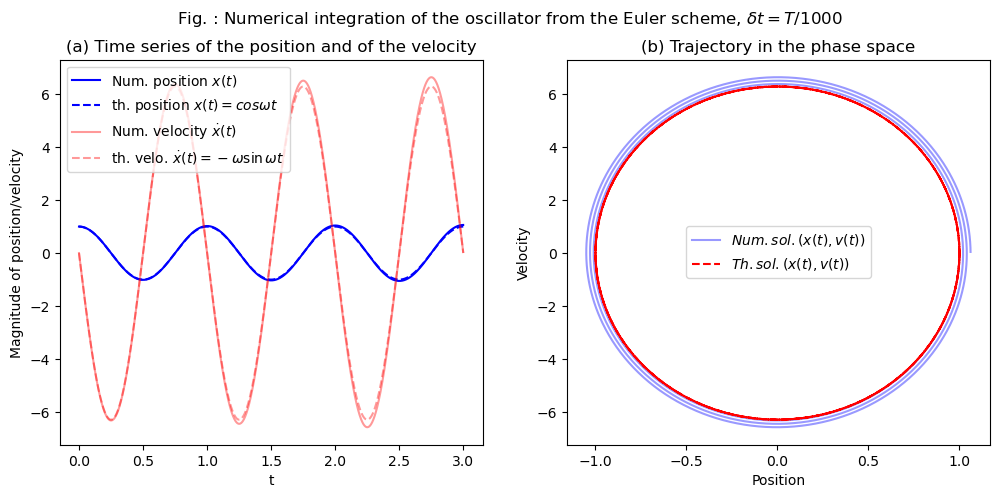

In [6]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(window, positions,'b', label='Num. position $x(t)$')
plt.plot(th_window, th_positions,'b--', label='th. position $x(t)=cos\omega t$')
plt.plot(window, velocities,'r', alpha=0.4, label='Num. velocity $\dot x(t)$')
plt.plot(th_window, th_velocities,'r--', alpha=0.4, label='th. velo. $\dot x(t)=-\omega\sin\omega t$')
plt.xlabel('t')
plt.ylabel('Magnitude of position/velocity')
plt.legend()
plt.title('(a) Time series of the position and of the velocity');

plt.subplot(122)
plt.plot(positions, velocities, 'b', alpha=0.4, label='$Num. sol. (x(t),v(t))$')
plt.plot(th_positions, th_velocities,'r--', label='$Th. sol. (x(t),v(t))$')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.legend()
plt.title('(b) Trajectory in the phase space')
plt.suptitle("Fig. : Numerical integration of the oscillator from the Euler scheme, $\delta t =  T/1000$");

<div style="color:blue;background:rgba(255, 99, 71, 0.2)">
<b> Question </b><br>
Compare the analytical solution with the numerical solution. Can you explain the difference between the theoretical and the numerical solution? (try simulation with other numbers of time step by period e.g. $ndt=10$)
</div>

***answer here***

**Animation in phase space $(x,\dot x)$**

To better understand the dynamics, we propose a short movie which shows the state moving in the phase space

![Animation of oscillator](./img/anim_traj-oscillator.gif)

<div style="color:blue;background:rgba(255, 99, 71, 0.2)">
<b> Question </b><br>
What is the time evolution of the state in the phase space ?
</div>

### **1.3 Illustration to Lorenz63**

**Lorenz's dynamical system**

A very classical dynamics encountered in geoscience and more generally in dynamical system is the Lorenz's equations [Lorenz (1963)][], which are given by
\begin{equation}
(6) \qquad \left\{\begin{array}{l} 
{\frac{dX}{dt}}=\sigma(Y-X),\\{\frac{dY}{dt}}=(r-Z)X-Y,\\
{\frac{dZ}{dt}}=XY-bZ.\end{array}\right.
\end{equation}

where here $r,\sigma$ and $b$ are parameters whose physical meaning is not essential for the realization of the TP. In practice, we give ourselves the following values $r=10$ and $b=8/3$. Different values of $r$ can be used to
be used to observe variations in the type of solution to the system Eq.(1).


[Lorenz (1963)]: https://journals.ametsoc.org/view/journals/atsc/20/2/1520-0469_1963_020_0130_dnf_2_0_co_2.xml "E. N. Lorenz, “Deterministic nonperiodic flow,” Journal Atmospheric Sciences, vol. 20, pp. 130–141, 1963."

<div style="color:blue;background:rgba(255, 99, 71, 0.2)">
<b> Question </b><br>
Compared with Eq.(1), and identify who is $\mathbf{x}$ and $f(\mathbf{x})$.
</div>

**Numerical exploration of Lorenz system**

In [7]:
def trend_lorenz(x):
    ''' Compute the rend of the dynamical system '''
    X,Y,Z = x
    r, sigma, b = 32, 10, 8/3
    dX = sigma*(Y-X) 
    dY = (r-Z)*X-Y   
    dZ = X*Y-b*Z
    return np.array([dX, dY, dZ])


# Initial condition
state0 = np.array([-0.08633557,  3.40588334, 27.90628611])
    
# set time window
dt = 0.01
ndt = 2000
t_short = dt * np.arange(ndt)

# Compute trajectory
short_traj = forecast_euler(t_short,state0, trend_lorenz)

**Short term prediction of the model**

In [8]:
X, Y, Z = short_traj.T

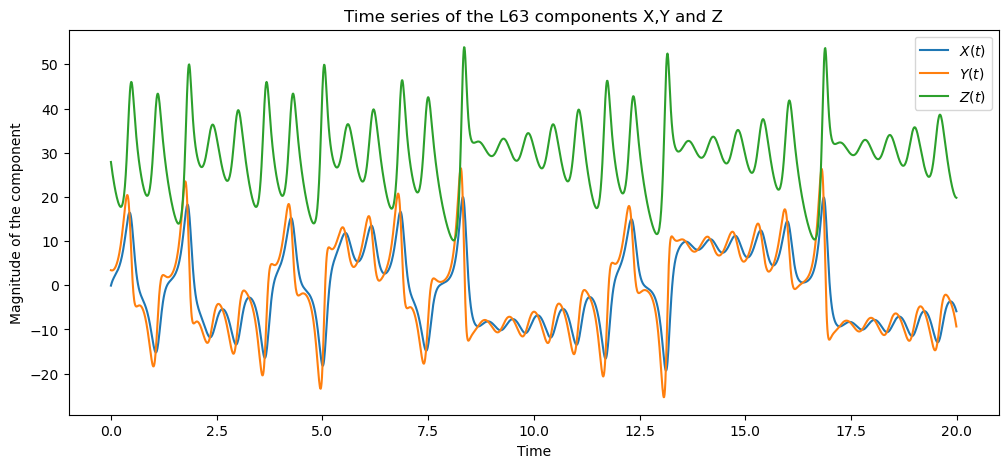

In [9]:
plt.figure(figsize=(12,5))

plt.plot(t_short, X, label='$X(t)$')
plt.plot(t_short, Y, label='$Y(t)$')
plt.plot(t_short, Z, label='$Z(t)$')

plt.xlabel('Time')
plt.ylabel('Magnitude of the component')
plt.title('Time series of the L63 components X,Y and Z')
plt.legend();


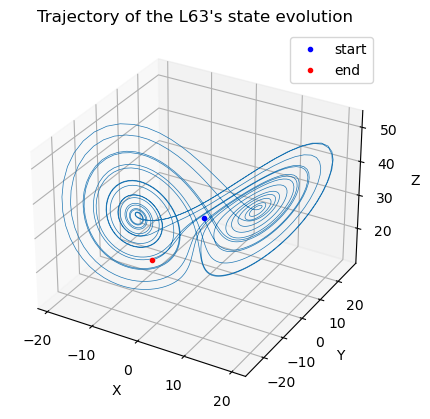

In [10]:
# Plot in 3D Representation (X,Y,Z) -- configuration space
ax = plt.figure().add_subplot(projection='3d')

ax.plot(X,Y,Z, lw=0.5)
ax.plot(X[0],Y[0],Z[0],'b.',label='start')
ax.plot(X[-1],Y[-1],Z[-1],'r.',label='end')
plt.legend()
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Trajectory of the L63's state evolution");

<div style="color:blue;background:rgba(255, 99, 71, 0.2)">
    <b> Question </b><br>
    What do you think about the time evolution of the system ? 
    </div>

***Answer here***

**Long term integration**

In [11]:
# Set initial state
ndt = 30000
t_long = dt * np.arange(ndt)
# Compute trajectory
long_term_traj = forecast_euler(t_long, state0, trend_lorenz)

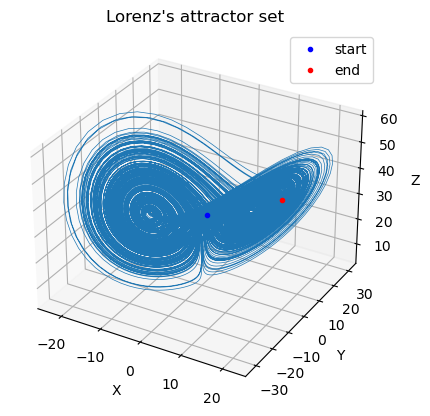

In [12]:
# Plot in 3D Representation (X,Y,Z) -- configuration space
X, Y, Z = long_term_traj.T
ax = plt.figure().add_subplot(projection='3d')

ax.plot(X,Y,Z, lw=0.5)
ax.plot(X[0],Y[0],Z[0],'b.',label='start')
ax.plot(X[-1],Y[-1],Z[-1],'r.',label='end')
plt.legend()
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Lorenz's attractor set");

<div style="color:blue;background:rgba(255, 99, 71, 0.2)">
<b> Question </b><br>
In a terminal, run `python ./tools/lorenz.py` and play with the resulting 3D representation.
</div>

<div style="color:blue;background:rgba(255, 99, 71, 0.2)">
<b> Question </b><br>
What does this trajectory corresponds to meteorology ?
</div>

***answer here***

<div style="color:blue;background:rgba(255, 99, 71, 0.2)">
<b> Question </b><br>
Can you represent an abstract illustration of the dynamics of a solution of Eq.(1) when the state is given by a vector in an arbitrary dimension $n$ ? 
</div>

***answer here***

### **1.4 Intermediate Conclusion**

<div style="background:lightgreen">
<b> Conclusion </b><br>

This part introduces several important points:
<ul>
<li> First it recall the formalism that govern the evolution of a system given by a state and whose evolution is governed by ordinary differential equation (in a vector space).
<li> Time series represent the time evolution of all (or a part) of the components of the state of the system. This representation is natural but can hide important features of the dynamics, namely the attractor 
<li> Another representation of interest is the trajectory in state-space that can be seen as the motion of a mobile point,
<li> The trajectory shows simple behavior as the periodic orbit associated with the time evolution of the linear oscillator,
<li> But perdiodic orbit are not the only behaviour of non-divergent dynamics which can also show much more complex evolution as the strange attractor of the Lorenz's dynamics, which is the climate of this model.
</ul>
    
All these points are important since they provide simple conceptual ideas about dynamics, and can be used to figure out what is the behaviour of some physical system as the ocean or the atmosphere (at least their numerical representation).
    
<b>What is the link with partial differential equation of the Nature ? </b>
</div>

## **2. Exploration of the dynamics of geophysical system -- illustration with the quasi-geostrophic equations**

### **2.1 How to numerically solve geophysical dynamics?**

Partial Differential Equations (PDE) are commons in fluid dynamics. For instance, at low Rossby number $R_o=\frac{U}{f L}$ where $U$ and $L$
are two typical scales of velocity and scale respectively, shalow water equations are simplifies as the quasi-geostrophic equations which reads as 
$$(7)\qquad\left\{
\begin{array}{l}
\partial_t q +\mathbf{u}\cdot\nabla q = 0,\\
\mathbf{u} = \textbf{k}\times\nabla\psi,\\
q = \nabla^2 \psi-\lambda^{-2}\psi.
\end{array}\right.
$$

where $\lambda = \frac{\sqrt{g H}}{f} $ is the [Rossby's radius of deformation](https://en.wikipedia.org/wiki/Rossby_radius_of_deformation) which characterizes the typical size of mid-lattitude ocean and atmospherical cyclones. This dynamics is given in a 2D domain of coordinate $\mathbf{x}=(x,y)$ (take care to not confuse with state vector $\mathbf{x}$ as given in Es.(1)).

**From the PDE to the ODE**

We can formulate the equations of a fluid as Eq.(7), in the form of a system of partial differential equations
$$(8)\qquad\partial_t \chi = \mathcal{F}(\partial^\alpha \chi),$$
where $\chi(t,x)$ denotes a set of physical fields (pressure, temperature, humidity, velocity or its divergence/vorticity part,...) depending on time $t$ and space coordinates $x$, and $\partial^\alpha\chi$ denote the different spatial derivatives *e.g.* $\partial_x\chi$ or $\partial_x^2\chi$.

After a spatial discretization of the differential operators, the system of partial differential equations Eq.(8) is transformed into a system of ordinary differential equations of order $1$ (in derivation order)
$$(1)\qquad\frac{d\mathbf{x} }{dt}=f(\mathbf{x}),$$
with $\mathbf{x}\in {\mathbb R}^n$ a vector and $f:{\mathbb R}^n$ a differentiable application.

Ainsi, le problème de la résolution numérique revient à celui de la résolution d'une équation différentielle ordinaire (EDO) en dimension finie. Ce qu'on aborde dans la section suivante.

### **2.2 Spatial discretization: mode decomposition and the Galerkin projection**

**Mode decomposition of a continuous field**

Any spatial discretization can be formalized as an expansion of physical $\chi(t,x)$ fields within a basis $(\phi_k(x))_{k\in\mathbb{N}}$, as
<div style="background:lightgreen">
$$\chi(t,x) = \sum_{k\in\mathbb{N}} \chi_k(t)\phi_k(x),$$
</div>


from which only a truncated sum is retained so that 
<div style="background:lightgreen">
$$(9)\qquad \chi^K(t,x)\equiv \sum_{k\in[0,K]} \chi_k(t)\phi_k(x),$$
</div>


provides an approximation of $\chi(t,x)$, *i.e.* $\chi^K(t,x)\approx \chi(t,x)$.

<span style='color:blue'>**Advanced reading : Galerkin projection**</span>

In particular, $\chi^K\in V^K$ where $V^K = \mathrm{Span}\left((\phi_k(x))_{k\in[1,K]}\right)$.

Replacing this approximation in the dynamics Eq.(8) leads to 
$$(10)\qquad\partial_t \chi^K = \mathcal{F}(\partial^\alpha \chi^K)+R(\partial^\alpha \chi^K),$$
where $R(\partial^\alpha \chi^K)$ is called the **residu**. 

If $\chi^K$ is solution of Eq.(9), then $R(\partial^\alpha \chi^K)$ is zero. However, most of time, the residue is not nul and writes as 
$$(11)\qquad R(\partial^\alpha \chi^K) = \sum_{k\in[0,K]} r_k\phi_k(x),$$
with $r_k = \langle \phi^*_k| R(\partial^\alpha \chi^K)\rangle$, where $(\phi^*_k(x))_{k\in[1,K]}$ is the dual base of 
$(\phi_k(x))_{k\in[1,K]}$.

The Galerkin method consists in finding the equation so that the residue is null in $V^K$, that is 
$$(12)\qquad \langle \phi^*_k| R(\partial^\alpha \chi^K)\rangle=0,\text{ for any }k\in[1,K].$$

### **2.3 <span style='color:blue'>Advanced reading -- </span>Example: Discretization of the diffusion equation from the Fourier space**

**The diffusion equation and Fourier modes**

If we consider the diffusion equation 
$$(13)\qquad \partial_t T = \partial_x^2 T,$$ 
defined on the periodic domain $[0,2\pi)$, then Fourier serie leads to introduce the basis $(e_k)_{k\in\mathbb{Z}}$ where $e_k(x)=e^{\iota kx}$ with $\iota^2=-1$ so that any $2\pi-$periodic function reads as 
$$T(t,x) = \sum_{k\in\mathbb{Z}} T_k(t)e_k(x).$$

**Truncated serie approximation**

If we introduce the truncated sum 
$$T^K(t,x) = \sum_{k=-K}^K T_k(t)e_k(x),$$
then the residue Eq.(11), as defined from Eq.(10), reads as
$$R(T^K)  = \partial_t T^K - \partial_x^2 T^K = \sum_{k=-K}^K \left(\frac{d}{dt}T_k(t) - (-k^2) T_k(t)\right)e_k(x),$$

**Galerkin projection: Transformation of the continuous diffusion equation into a discret system of ordinary differential equations**

Since we know that the Fourier basis $(e_k)_{k\in\mathbb{Z}}$ is orthonormal for the dot product (or inner product) defined by $\langle f|g \rangle = \frac{1}{2\pi}\int_0^{2\pi}(f(x))^*g(x)dx$ (where $z^*$ denotes the complex conjugate of a complex number $z$), we deduce that the dual basis is the Fourier basis itself, with 
$$\langle e_k|e_l \rangle=\left\{
\begin{array}{l}
1 \text{ when }k=l,\\
0 \text{ when }k\neq l.
\end{array}\right.
$$

and from which the Galerkin projection leads to the set of equations
$$(14)\qquad \frac{d}{dt}T_k(t) = (-k^2) T_k(t), \text{ for any }k\in[-K,K],$$
which is equivalent to the ODE Eq.(1).

### **2.4 Example: Revisiting Lorenz's 63  dynamical equations (from the article of 1980)**

[Lorenz (1980)][] has shown that equations he obtained in 1963 can be obtained from large scale motion of the atmosphere governed by Eq.(7), that is
$$(7)\qquad\left\{
\begin{array}{l}
\partial_t q +\mathbf{u}\cdot\nabla q = 0,\\
\mathbf{u} = \textbf{k}\times\nabla\psi,\\
q = \nabla^2 \psi-\lambda^{-2}\psi,
\end{array}\right.
$$
where on a 2D periodic domain of length $L$ ad coordinates $\mathbf{x}=(x,y)$.

When any field $\alpha(t,\bf{x})$ is decomposed as the sum
$$(15)\qquad\alpha(t,\mathbf{x}) = \alpha_1(t) e_{\mathbf{k}_1}(\mathbf{x})+\alpha_1(t) e_{\mathbf{k}_2}(\mathbf{x})+\alpha_1(t) e_{\mathbf{k}_3}(\mathbf{x}),$$
where $(\mathbf{k}_1,\mathbf{k}_2,\mathbf{k}_3)$ are three wavenumber vectors, and $e_{\mathbf{k}_i}(x)=e^{\iota\mathbf{k}_i\cdot \mathbf{x}}$. Here the wavenumber vectors verify
$$\mathbf{k}_1+\mathbf{k}_2+\mathbf{k}_3=0,$$
that is a triadic interaction, typical terms we obtain from the product of field which leads to a convolution product of Fourier's mode, *e.g.* as encoundered with the advection in fluid dynamics. [Lorenz (1980)][]  chose the wavenumber vectors $\mathbf{k}_1= (0, 1)/L$, $\mathbf{k}_2= (\frac{\pi}{6}, \frac{\pi}{6})/L$ and $\mathbf{k}_2=-\mathbf{k}_1-\mathbf{k}_2$.

Modes $e_{\mathbf{k}_i}$ are orthonormal for the dot product $\langle f|g \rangle = \frac{1}{L^2}\int_{[0,L]\times[0,L]}f(\mathbf{x})g(\mathbf{x})d\mathbf{x}$.

[Lorenz (1980)]: https://journals.ametsoc.org/view/journals/atsc/37/8/1520-0469_1980_037_1685_asaqge_2_0_co_2.xml "E. N. Lorenz, “Attractor sets and Quasi-Geostrophic equilibrium,” Journal Atmospheric Sciences, vol. 37, pp. 1685–1699, 1980."

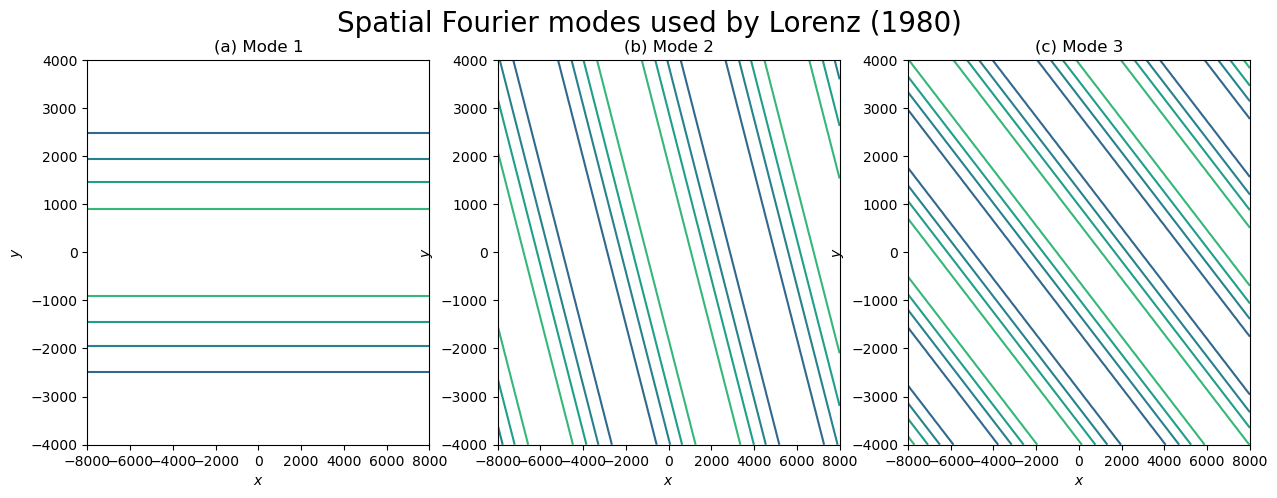

In [13]:
plt.figure(figsize=(15,5))

npt = 50
x = np.linspace(-8000,8000,2*npt)
y = np.linspace(-4000,4000,npt)
[x,y] = np.meshgrid(x,y,indexing='ij')

# Build spatial modes
L = 1080
k1=np.array([0, 1])/L
k2=np.array([np.cos(np.pi/6), np.sin(np.pi/6)])/L
k3=-k1-k2;

psi = np.array([np.cos(k[0]*x+k[1]*y) for k in [k1,k2,k3]])    

tags= 'abc'
for k,psi in enumerate(psi):
    plt.subplot(131+k)
    plt.contour(x, y, psi, np.linspace(-2,2,10))
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.title(f'({tags[k]}) Mode {k+1}')
plt.suptitle("Spatial Fourier modes used by Lorenz (1980)", fontsize=20);

**Expansion of the geopotential**

Applying the decomposition Eq.(8) for the geopotential $\psi$ as 
$$(16)\qquad\psi(t,x,y) = \left(aZ(t)+b\right) e_{\mathbf{k}_1}(x,y)+ aY(t)\alpha_1 e_{\mathbf{k}_2}(x,y)+cX(t) e_{\mathbf{k}_3}(x,y),$$
where $(a,b,c)$ are given constants (see [Lorenz (1980)][]), and replacing in Eq.(7) leads to the equations Eq.(6) that is
\begin{equation}
(6) \qquad \left\{\begin{array}{l} 
{\frac{dX}{dt}}=\sigma(Y-X),\\{\frac{dY}{dt}}=(r-Z)X-Y,\\
{\frac{dZ}{dt}}=XY-bZ.\end{array}\right.
\end{equation}

[Lorenz (1980)]: https://journals.ametsoc.org/view/journals/atsc/37/8/1520-0469_1980_037_1685_asaqge_2_0_co_2.xml "E. N. Lorenz, “Attractor sets and Quasi-Geostrophic equilibrium,” Journal Atmospheric Sciences, vol. 37, pp. 1685–1699, 1980."

**Animation of the interacted modes**

The previous modes can be used to build time evolution of fields as the geopotential $\psi$ (or the stream function).

In [14]:
filename='./img/lorenz.mp4'
import io
import base64
from IPython.display import HTML
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
        <source src="data:video/mp4;base64,{0}" type="video/mp4" />
     </video>'''.format(encoded.decode('ascii'))) 

<div style="color:blue;background:rgba(255, 99, 71, 0.2)">
<b> Question </b><br>
Can we conclude that Lorenz's equations, Eq.(6), solve a geophysical fluid dynamics?
</div>

### **2.5 Intermediate conclusion**

<div style="background:lightgreen">
<b> Conclusion </b><br>

This part introduces several important points:
<ul>
<li> Partial differential equations can be discretized from a spatio-temporal decomposition of physical fields as $$\alpha(t,\mathbf{x})=\sum_{k\in\mathbb{N}} \alpha_k(t)\phi_k(\mathbf{x}),$$ where $(\phi_k)_{k\in\mathbb{N}}$ is a basis (of a certain functional space not detailed here) and where $\mathbf{x}$ denotes the coordinate system used to identify points in the physical domain <i>e.g.</i> $\mathbf{x}=(x,y,z)$ for a standard 3D domain,
<li> This discretization is used to translate partial differential equations into a system of ordinary differential equations of order $1$, $$\frac{d\mathbf{x}}{dt}=f(\mathbf{x}),$$ where this time $\mathbf{x}\in\mathbb{R}^n$ denotes an abstract state vector.
<li> To obtain these differential equation, Galerkin projection can be considered where the dual basis $(\phi_k^*)_{k\in\mathbb{N}}$ plays an important role.
<li> While $(\phi_k)_{k\in\mathbb{N}}$ can be arbitrary, the case where there exists a dot product so that $(\phi_k)_{k\in\mathbb{N}}$ is an orthonomal basis simplifies the analysis since the dual basis is no more the basis $(\phi_k)_{k\in\mathbb{N}}$ itself. In particular, this means that $(\phi_k)_{k\in\mathbb{N}}$ are orthogonal.
</ul>    
    
<b>Can we guess the natural mode of variability of the nature ?</b>
</div>

## **3. How can be find natural modes of variability from the data : computation of the Empirical Orthogonal Functions (EOF)**

### **3.1 Principal Axes / Principal Components / Karhunen Loève basis**

#### **3.1.1 Background in finite dimension statistics**

**Mean and covariance**

If $\mathbf{x}\in\mathbb{R}^n$ is a random vector of finite variance, that is $\mathbb{E}[||\mathbf{x}||^2]<\infty$ where $\mathbb{E}$ denotes the expectation operator, then its first two statistical moments exist, that is:
1. the mean $\mathbb{E}[\mathbf{x}]$, also denoted by $\overline{\mathbf{x}}$,
2. the covariance matrix 
$$(17)\qquad\mathbf{V}= \mathbb{E}[(\mathbf{x}-\overline{\mathbf{x}})(\mathbf{x}-\overline{\mathbf{x}})^T],$$ whose diagonal constains the vairances.

If $\Sigma^2 = \mathrm{diag}(\mathbf{V})$ denotes the diagonal matrix formed by the variances, 

**Centered version**

The centered and normalized version of $\mathbf{x}'$ can be introduced, defined by 
<div style="background:lightgreen">
$$(18)\qquad\mathbf{x}' = \mathbf{x}-\overline{\mathbf{x}}.$$
</div>
Hence, the covariance matrix of $\mathbf{x}$, can be computed as 
<div style="background:lightgreen">
$$(19)\qquad\mathbf{V} = \mathbb{E}[\mathbf{x}'(\mathbf{x}')^T].$$
</div>



#### **3.1.2 Principal Axes / Principal Components**

**Spectral decomposition of the covariance matrix**

Since $\mathbf{V}$ is real and symmetric *i.e.* $\mathbf{V}^T=\mathbf{V}$, for the canonical dot product, there exists an orthogonal basis $(\mathbf{e}_k)_{k\in [1,n]}$ so that 
<div style="background:lightgreen">
$$(20)\qquad\mathbf{V} = \sum_{k=1}^n \lambda_k \mathbf{e}_k\mathbf{e}_k^T, $$
</div>
where $\mathbf{e}_k\mathbf{e}_k^T$ is the orthogonal projector on the real line $\mathbb{R}\mathbf{e}_k$ and $\lambda_k$ is the eigenvalue associated with the eigenvector $\mathbf{e}_k$ *i.e.* 
$$(21)\qquad\mathbf{V}\mathbf{e}_k = \lambda_k \mathbf{e}_k,$$
such that the eigenvaluse s $(\lambda_k)$ are reals and of decreasing order, $\lambda_1\geq \lambda_2\geq\cdots\geq \lambda_n$.

The vectors $(\mathbf{e}_k)$ are called the **principal axes** or **principal components**. 

**Statistical interpretation of the pincipal axes as the direction of maximum variability**

From the definition of the decomposition Eq.(20), it follows that the unit vector $\mathbf{e_1}$ is the direction along wich the variability is the largest: 

if $\mathbf{u}$ denotes a unit vector, then $x_\mathbf{u} = \langle \mathbf{u}|\mathbf{x}'\rangle= \mathbf{u}^T\mathbf{x}'$ is a random variable of mean zero and of variance 
$$V(x_\mathbf{u}) 
= \mathbb{E}[x_\mathbf{u}^2]
= \mathbb{E}[\mathbf{u}^T\mathbf{x}' (\mathbf{u}^T\mathbf{x}')^T ]=\mathbb{E}[\mathbf{u}^T\mathbf{x}' \mathbf{x}'^T \mathbf{u}]
= \mathbf{u}^T\mathbb{E}[\mathbf{x}' \mathbf{x}'^T] \mathbf{u} = \mathbf{u}^T\mathbf{V} \mathbf{u},$$
which is maximal for $\mathbf{u}=\pm \mathbf{e}_1$.

<div style="color:blue;background:rgba(255, 99, 71, 0.2)">
<b> Question </b><br>
Show from Eq.(20) that $$\mathbf{e}_1 = \underset{\mathbf{u}}{\mathrm{Arg Max}}\quad \mathbf{u}^T\mathbf{V} \mathbf{u} \text{ such that } \mathbf{u}^T\mathbf{u} = 1.$$
    </div>

(*Indication: show that $\mathbf{u}^T\mathbf{V} \mathbf{u} = \lambda_1 -\sum_{k>1} |\lambda_1-\lambda_k|u_k^2\leq \lambda_1$ with an equality when $\mathbf{u}=\pm\mathbf{e}_1$, where we used that $u_1^2 = 1 - \sum_{k>1} u_k^2$ -- from the unitary of $\mathbf{u}$ -- with $u_k=\mathbf{e}_k^T \mathbf{u}$ the $\textrm{i}^\textrm{th}$ component of $\mathbf{u}$ in the basis $(\mathbf{e}_k)$*)

Similarly
$$\mathbf{e}_2 = \underset{\mathbf{u}}{\mathrm{Arg Max}}\quad \mathbf{u}^T\mathbf{V} \mathbf{u} \text{ such that } \mathbf{u}^T\mathbf{u} = 1 \text{ and } \mathbf{u}^T\mathbf{e}_1 = 0, $$
or
<div style="background:lightgreen">
$$\mathbf{e}_k = \underset{\mathbf{u}}{\mathrm{Arg Max}}\quad \mathbf{u}^T\mathbf{V} \mathbf{u} \text{ such that } \mathbf{u}^T\mathbf{u} = 1 \text{ and } \mathbf{u}^T\mathbf{e}_i = 0, \quad \forall i\in[1,k-1] $$
</div>



**Explained variance**

The amount of error of reconstruction when approximating the full covariance matrix by only the first $n'\leq n$,
$$(20)\qquad\mathbf{V}_{n'} = \sum_{k=1}^{n'} \lambda_k \mathbf{e}_k\mathbf{e}_k^T\approx V $$

leading components is quantified by the **explained variance** which is often computed as a **Percentage of Variance
Explained** (PVE) 
<div style="background:lightgreen">
$$PVE = 100\frac{\sum_{k=1}^{n'}\lambda_k}{\sum_{k=1}^{n}\lambda_k},$$
</div>

where the **explained variance by the component $\mathbf{e}_k$** is 
$$PVE_k = 100\frac{\lambda_k}{\sum_{k=1}^{n}\lambda_k}.$$

**Illustration of the principal axes in 2D data: 2D random vector and synthetic dataset**

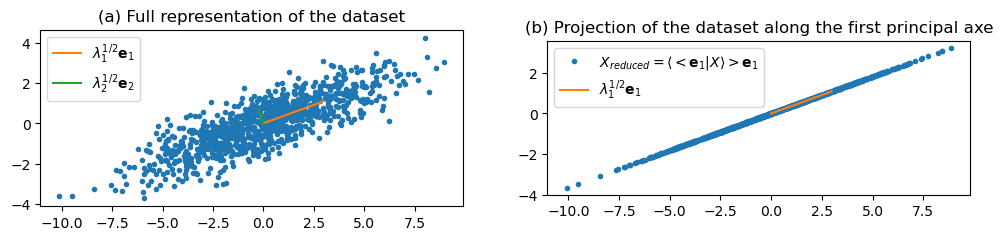

In [15]:
# Diagonal of eigenvalues
s = np.array([10, 0.5])
D = np.diag([10, 0.5])
# Rotation matrix U
theta_degree = 20
theta = theta_degree/180*np.pi
U = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
# Computation of the covariance matrix
V = U@D@U.T
# Generation of a dataset
sqrtV = U@np.sqrt(D)@U.T
n_data = 1000
data = sqrtV @ np.random.normal(size=(2,n_data))

# Plot of the dataset
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(data[0,:],data[1,:],'.') 
plt.plot(np.array([0,np.sqrt(s[0])*U[0,0]]),np.array([0,np.sqrt(s[0])*U[1,0]]), label='$\lambda_1^{1/2}\mathbf{e}_1$')
plt.plot(np.array([0,np.sqrt(s[1])*U[0,1]]),np.array([0,np.sqrt(s[1])*U[1,1]]), label='$\lambda_2^{1/2}\mathbf{e}_2$')
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.legend()
plt.title('(a) Full representation of the dataset')

# Plot of the dataset
plt.subplot(122)

e1 =U[:,0]
proj = np.array([comp*e1 for comp in e1.T@data])
plt.plot(proj[:,0],proj[:,1],'.', label='$X_{reduced} = \langle<\mathbf{e}_1|X\\rangle>\mathbf{e}_1$')
plt.plot(np.array([0,np.sqrt(s[0])*U[0,0]]),np.array([0,np.sqrt(s[0])*U[1,0]]), label='$\lambda_1^{1/2}\mathbf{e}_1$')

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.legend()
plt.title('(b) Projection of the dataset along the first principal axe');

<div style="color:blue;background:rgba(255, 99, 71, 0.2)">
<b> Question </b><br>
<ol>
<li> What is the explained variance associated with the first principal axes ?
<li> How do the plots are changing when varying the parameters (angle of rotation, magnitude of the eigenvalues,..)
</ol>
    </div>

***Answer here***

#### **3.2.2 Approximation theory of random fields (infinite dimension)**

see *e.g.* chap. 1 of [Mallat (1999)][]

[Mallat (1999)]: ./ "S. Mallat, A Wavelet Tour of Signal Processing. Academic Press, 1999, p. 620."

**Linear approximation**

In case where $\alpha(x)$ is a random field (a function of infinite dimension) it can be approximate from a finite expansion in an orthonormal basis $(g_k(x))_{k\in\mathbb{N}}$ (for a dot product $\langle|\rangle$) as 
$$(22)\qquad\alpha^K = \sum_{k=1}^K \langle g_k|\alpha \rangle g_k,$$
leading to an approximation error 
$$(23)\qquad\varepsilon[K] = \mathbb{E}\left[||\alpha - \alpha^K||^2\right] = \sum_{k=1}^K \mathbb{E}\left[\langle g_k|\alpha \rangle^2\right],$$

**Optimal linear approximation: Karhunen-Loève basis**

The orthonormal basis that minimizes the approximation error Eq.(22) is unique and is called the **Karhunen-Loève basis**

**Link with the principal components**

The Karhunen-Loève basis plays a role similar to the principal components that appear in Eq.(20).

### **3.2 Empirical Orthogonal Functions / Principal Component Analysis**

**Estimation of the covariance matrix from a dataset**

When a random vector $\mathbf{x}$ is known from samples *e.g.* an ensemble of data $\mathbf{X}=[\mathbf{x}_1\cdots \mathbf{x}_N]$ where each $\mathbf{x}_i$ is a sample  of the random vector $\mathbf{x}$.

The empirical mean $\tilde{\mathbf{x}} = \frac{1}{N}\sum_k \mathbf{x}_k$ is an estimator of the mean $\mathbb{E}[\mathbf{x}]$, and is used to center the data leading to  
$$(24)\qquad\mathbf{X}'=[\mathbf{x}_1-\tilde{\mathbf{x}}\cdots \mathbf{x}_N-\tilde{\mathbf{x}}],$$ 
so an approximation of the covariance matrix reads as 
$$(25)\qquad\tilde{\mathbf{V}} = \frac{1}{N}\mathbf{X}'(\mathbf{X}')^T.$$

**Estimation of the Principal Component: computation of the Empirical Orthogonal Functions**

The computation of the diagonalisation of $\tilde{\mathbf{V}}$ can be computed from the **Singular Value Decomposition** (SVD) algorithm as the one available in `numpy.linalg`, which take an arbitrary matrix $\mathbf{M}$ of size $(n,m)$ and expand it as the product
$$(26)\qquad\mathbf{M} =\mathbf{UDO}^T,$$
where $\mathbf{U}$ ($\mathbf{O}$)is an orthogonal matrix of size $(n,n)$ ($(m,m)$), and $\mathbf{D}$ is diagonal matrix of size $(n,m)$ which contain the socalled singular values.

For a symmetric matrix, $\mathbf{U} = \mathbf{O}$, and $\mathbf{D}$. Note that this particular situation helps to understand why ther exists a decomposition as Eq.(26) for any arbitrary matrix since this decomposition results from the SVD decomposition of the matrix 
$\mathbf{M}\mathbf{M}^T = \mathbf{UD}^2\mathbf{U}^T$ and of $\mathbf{M}^T\mathbf{M} = \mathbf{OD}^2\mathbf{O}^T$.

Hence, the diagonalization of $\tilde{\mathbf{V}}$ can be obtained from the SVD. Since the resulting orthonormal basis is deduced from the data, the principal axes are often called the **Empirical Orthogonal Functions**.

**Illustration of the principal axes in 2D data: 2D random vector and synthetic dataset**

We consider the dataset generated in the example detailed in previous Section 3.1.2.

<div style="color:blue;background:rgba(255, 99, 71, 0.2)">
<b> Question </b><br>
<ol>
<li> Check that the following code computes the SVD decomposition.
<li> Verify that the leading directions correspond to the prescribed ones.
<li> Verify that the variance along the leading directions are the prescribed ones.
</ol>
    </div>

In [16]:
# 1. Computation of the EOF from an SVD (np.linalg.svd)

# Compute of the mean
mean = data.mean(axis=1)
# Center the dataset
data_prime = data - mean @ np.ones(data.shape)
# Compute the covariance matrix
V_data = data_prime @ data_prime.T / n_data
# Compute the SVD decomposition from np.linalg.svd
U_data, D_data, _ = np.linalg.svd(V_data)

In [17]:
# 2. Compare the first leading direction with the prescribed one
U_data[:,0], e1

(array([-0.93726368, -0.34862128]), array([0.93969262, 0.34202014]))

In [18]:
# 3. Compare the variance along the leading direction with the prescribed ones
D_data, np.diag(D)

(array([10.10768285,  0.46757551]), array([10. ,  0.5]))

**Efficient computation of the leading EOF without computation of the full SVD**

However, when the dimension state space is large, the matrix $\tilde{\mathbf{V}}$ can be too big to compute the SVD, then alternative exist to compute the first singular vector associated with the leading singular values. For instance, `scikit learn` proposed two methods for the computation, called `PCA` and `TruncatedSVD`.

These first leading components can be estimated from tricky methods (*e.g.* [Baldwin (2009)][] which discuss a flot gradient estimation)

[Baldwin (2009)]:https://doi.org/10.1175/2008jcli2147.1. "M. P. Baldwin, D. B. Stephenson, and I. T. Jolliffe, “Spatial Weighting and Iterative Projection Methods for EOFs,” Journal of Climate, vol. 22, no. 2, pp. 234–243, Jan. 2009, doi: 10.1175/2008jcli2147.1."


<div style="color:blue;background:rgba(255, 99, 71, 0.2)">
<b> Question </b><br>
Find the web references for `PCA` and `TruncatedSVD` routines from scikitlearn.
</div>

### **3.3 Intermediate conclusion**

<div style="color:blue;background:rgba(255, 99, 71, 0.2)">
<b> Question </b><br>
Give the results you think important to retain from this theoretical presentation of the EOFs
</div>

<div style="background:lightgreen">
<b> Conclusion </b><br>

..
<ul>
<li> ..
<li> ..
</ul>    
    
<b> We now explore EOF analysis for outputs of a Global Circulation Model, with a focus on the temperature and the geopotential. </b>
</div>

## **4. Application to the analysis of climat data: PUMA's simulation**

Since climate-data are often large dataset, and because of the global warming that leads to non-stationnarity of time series, we chose to consider a dataset build from the Global Circulation Model (GCM) [PUMA / PLASIM](https://www.mi.uni-hamburg.de/en/arbeitsgruppen/theoretische-meteorologie/modelle/plasim.html).

This model compute the socalled Primitive Equation on the sphere, using a triangular truncated [spherical harmonic](https://mathworld.wolfram.com/SphericalHarmonic.html) representation of fields
$$\alpha(t,\theta,\phi)  = \sum_{n=0}^T\sum_{m=-n}^n \alpha_n^m(t)Y_n^m(\theta,\phi),$$
where, in the following, the trunction is $T=21$ (other trunctions can be used as T31 and T42), which is the equivalent of the Fourier expansion applied to the the sphere.


### **4.1 Example of simulation using PUMA**



<div style="color:blue;background:rgba(255, 99, 71, 0.2)">
<b> Question  --  Only if PUMA is available on the machines otherwise the presentation will be given by the teacher</b><br>
To run a simulation in graphical mode, follow the instructions
<ol>
<li> In a terminal, find where puma is installed
<li> Run `./most.x`
<li> Select the configuration you want *e.g.* the kind of mode (PUMA or PLASIM), the number of CPU used for the parallel computation, the number of year of simulation,..
<li> Select "Save & run",
<li> Code are compiled, then a graphical interface appears,
<li> Select the button Play and .. enjoy the simulation,
<li> Select the red button to exit.
    </ol>
</div>

<div style="color:blue;background:rgba(255, 99, 71, 0.2)">
<b> Question </b><br>
Discuss in group about the different typical structure you observe on the simulation (do you see jet streams? Hadley cells ? thermal wind balance ? mid-lattitude cyclone ? .. ) 
</div>

<div style="color:blue;background:rgba(255, 99, 71, 0.2)">
<b> Question </b><br>
You saw a spin up at the beginning of the simulation (physical field are not.. physical, that is typical of real weather situation).
   Tell how to build a dataset of 30yrs of simulation without spinup ?
</div>

### **4.2 Long run of 30yrs of simulation for climate analysis**

A model simulation of 30 yrs takes the form of a list of numerical state vector $\mathbf{X}=[\mathbf{x}_1\cdots \mathbf{x}_N]$ where each $\mathbf{x}$ is a full numerical representation of the system. For instance, Fig. 1 shows the output of the Global Circulation Model PUMA, which is given as a vector $\mathbf{x}$ from which we can extract physical fields as the Geopotential (level of a given isobar), here the geopotential of the 850hPa level. In particular, Fig. 1 only shows a part of the vector $\mathbf{x}$.

<figure>
    <img src="./img/puma-t21-geopotential-at-850hPa.png"
         alt="PUMA's outpu Z850hPa in January">
    <figcaption>Fig. 1: PUMA's simulation after 1yr of simulation in January 1th: illustration of the geopotential at 850hPa (Z850) in geopotential meters.</figcaption>
</figure>

<div style="color:blue;background:rgba(255, 99, 71, 0.2)">
<b> Question </b><br>
Find the scientific documentation and the user guide to see the details of the equations of the dynamics, the coordinate system used and the number of vertical level used to perform a simulation.
</div>

Because the full numerical representation for such a long period leads to a very large dataset (few Go of data), the dataset only contains the geopotential and the temperature saved for the pressure levels: $200$ hPa, $500$ hPa and $850$ hPa.

### **4.3 Exploration of the dataset**

**Load usefull Python packages**

In [19]:
from netCDF4 import Dataset
try:
    import cartopy
except:
    !pip install cartopy
    
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
import numpy as np
import matplotlib.pyplot as plt

**Load data from a long trajectory of 30 yrs of simulation**

For use in google collab, you can join the dataset thanks to the link: https://drive.google.com/file/d/1K6TEPgnOWuaJdxapPqVrGh265JrGwGl8/view?usp=share_link
then copy the file in your pbl directory as './data/puma-T21-30yrs.nc' that is in 'My Drive/Colab Notebooks/pbl-climate-n7'

It you use jupyter notebook on your personal machine, then download the file in a local './data/' directory.

In [20]:
ncfile = Dataset('./data/puma-T21-30yrs.nc')

In [21]:
for field in ncfile.variables: 
    print(field)

lon
lat
lev
time
ta
zg


<div style="color:blue;background:rgba(255, 99, 71, 0.2)">
<b> Question </b><br>
What is the corresponding height of the pressure levels? (answer from the dataset)
</div>

In [22]:
# Code the answer here


**Introduction of a class to facilitate data handling**

In [23]:
class Puma(): 
    
    def __init__(self, ncfile):
        self.ncfile = ncfile
        
        # Extract lon / lat variables
        self.lats = ncfile.variables['lat'][:]
        self.lons = ncfile.variables['lon'][:]
        
        # Get the shape of the lat-ln grid
        self.grid_shape = ncfile.variables['zg'][:].shape[2:]
        
        # Extract pressure levels
        self.pressure_levels = ncfile.variables['lev'][:]
        
        # Extract geopotential 'zg'
        self.zg = ncfile.variables['zg'][:]
        # Extract temperature 'ta'
        self.ta = ncfile.variables['ta'][:]
        
    def plot(self, data, figsize=(12, 5), cmap='viridis', projection=ccrs.PlateCarree(), ax=None, colorbar=True, zminmax=None):
        
        shape=self.grid_shape
        lons=self.lons
        lats=self.lats        

        if ax is None:
            fig = plt.figure(figsize=figsize)
            ax = fig.add_subplot(1, 1, 1, projection=projection)
        else:
            fig = ax.figure

        # force to periodic data.
        data = add_cyclic_point(data)
        clons = [lon for lon in lons] + [360.]

        if zminmax is None:
            zminmax = np.linspace(data.min(), data.max(),10)
        
        if google_collab:
            plt.contourf(clons, lats, data)
            plt.xticks([0,360])
        else:
            CF = ax.contourf(clons, lats, data, zminmax,
                        # transform=ccrs.PlateCarree(),
                        # cmap='nipy_spectral'
                        cmap=cmap)        
            ax.coastlines()
            if colorbar:
                fig.colorbar(CF)
        # ax.set_global()
        return fig, ax

In [24]:
puma = Puma(ncfile)

In [25]:
puma.zg.shape

(10800, 3, 32, 64)

<div style="color:blue;background:rgba(255, 99, 71, 0.2)">
<b> Question </b><br>
Explain the previous shape of the array that contains the geopotentials
</div>

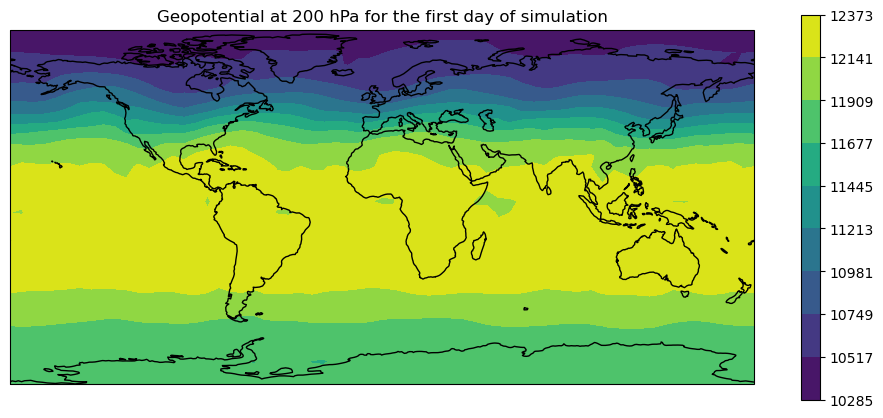

In [26]:
fig, ax = puma.plot(puma.zg[0][0])
ax.set_title('Geopotential at 200 hPa for the first day of simulation');

### **4.4 Univariate computation of the EOF**

Here we consider the univariate exploration of the geopotential field

In [27]:
# Example of analysis of the geopotential field for the near ground pressure level (850hPa)
zg = puma.zg[:,2,...]
zg.shape
ndate = zg.shape[0]
n = np.prod(puma.grid_shape)

#### **4.4.1 Computation of the first EOFs for Z850**

<div style="color:blue;background:rgba(255, 99, 71, 0.2)">
<b> Question </b><br>
Compute the EOFs for the geopotential at 850hPa.
<ol>
<li> The data being on the grid, you should flatten the array per date, then compute the anomalies (centered version of the data)
<li> Compute the EOFs from the SVD of numpy `np.linalg.svd` and plot the first 20th singular values
<li> Check that the SD decomposition leads to a rotation matrix $\mathbf{U}$
<li> Use <a href='https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html'>PCA from scikit learn (follow the link)</a> to compute the first 20 EOFs and plot the singular values
<li> Compare the first EOFs computed from the two methods.    
    </ol>
</div>

**a) Computation of EOF from an SVD**

In [28]:
# .. code todo usin np.linalg.svd

**b) Computation from an PCA of `sklearn`**

In [29]:
from sklearn.decomposition import PCA

# .. code todo

**c) Conclusions**

<div style="background:lightgreen">
<b> Conclusion </b><br>
.. Give your conclusion from this sub-section .. 
</div>

#### **4.4.2 Computation of the time series of the components in the EOFs**

<div style="color:blue;background:rgba(255, 99, 71, 0.2)">
<b> Question </b><br>
Compute the EOFs for the geopotential at 850hPa.
<ol>
<li> Compute the time series of the componentes of the geopotential in the EOFs
<li> Plot the time series of the components of the first EOFs
<li> Plot the trajectory of the state in the first EOFs components: planes (EOF_1, EOF_2), (EOF_1, EOF_3) and space (EOF_1, EOF_2,EOF_3)) -- for the 3D representation (EOF_1, EOF_2,EOF_3) see 3D plot of Lorenz63'.
    </ol>
</div>

In [30]:
# .. Todo

#### **4.4.3 Taking into account the coordinate system in the calculation of EOFs**

**Over weight of high latitude patterns**

Because the spherical geometry of the Earth, the use of a coordinate system implies deformation of geophysical structures.

<div style="color:blue;background:rgba(255, 99, 71, 0.2)">
<b> Question </b><br>
What is the effect of the lat-lon representation on high latitude structures ?
</div>

**Taking into account the metric induced by the projection**.

For geophysical data, it is necessary to take into account the spatial correlations present in the data and which are related to the coordinate system used for the projection.

Indeed, the scalar product introduced takes the form $||x|^2 = \frac{1}{4\pi}\int_{S^2} x^2(\theta,\phi) d\omega(\theta,\phi)$ if we consider the projection on the unit sphere ${S^2}$, with $d\omega(\theta,\phi)=\cos\phi d\theta d\phi$ the surface element Note that the normalization by $4\pi$ allows to construct an average operator such that $$||1||=1.$$

Numerically, for a lat-lon grid, this is equivalent to introducing the scalar product 
$$||\mathbf{x}|||_\mathbf{W}^2 = $\mathbf{x}^T\mathbf{W}\mathbf{x}.$$
with $$\mathbf{W} = Diag[\left(\cos \phi_i\right)_{i\in[1,\mathrm{nlat}]} ],$$
where $\left(\cos \phi_i\right)_{i\in[1,\mathrm{nlat}]}$ are the angles of latitude.


**Calculation of the Principal Components with the metric**

The anomalies being organized in the form of a table $\mathbf{X}=[\mathbf{x_1},\cdots,\mathbf{x_n}]$, we can consider the calculation of the principal components from the normalized table
$$\mathbf{X}'=\mathbf{W}^{1/2}\mathbf{X},$$
such that the covariance matrix is written
$$\Sigma = \frac{1}{n-1}\mathbf{X}'\left(\mathbf{X}'\right)^T = \frac{1}{n-1}\mathbf{W}^{1/2}\mathbf{X}\mathbf{X}^T\mathbf{W}^{T/2}.$$

Then, we just need to compute the first components of the singular vector decomposition of $\Sigma$, which can be done using `TruncatedSVD` from `sklearn`.

**Computation of the metrix matrix for lat-lon representation**

In [31]:
one_lev_metric = np.zeros(puma.grid_shape)    
for i in range(puma.grid_shape[1]):        
    one_lev_metric[:,i] = np.cos(puma.lats*np.pi/180)

# Normalization of the integral so that it corresponds to the integral \frac{1}{4\pi}\int_{S^2} d\omega.
one_lev_metric /= one_lev_metric.sum()


**Computation of the EOFs**

It is not possible to use PCA from sklearn because the dot product used is the canonical one. However, considering the metric, the dot product is no more canonical. 

In place of PCA, one can consider `TruncatedSVD` routine.

<div style="color:blue;background:rgba(255, 99, 71, 0.2)">
<b> Question </b><br>
Compute the first 20 multivariate EOFs by using SVD decomposition and the associated time series, compare with the previous computations.
</div>

In [32]:
from sklearn.decomposition import TruncatedSVD

# TODO

### **4.5 Multivariate EOFs**

**How to compare geopotential and temperature at the same time ?**


<div style="color:blue;background:rgba(255, 99, 71, 0.2)">
<b> Question </b><br>
<ol>
<li>Justify that we except a link between the geopotential and the temperature. 
<li>Compare the magnitudes of variations for the two fields.
<li>What should happend if nothing is done for the computation of the EOFs combining the multivariate information of geopotential and of temperature?
</ol>
    
</div>

See *e.g.* [Sparnocchia2003AG][] which illustrates an exploration of multivariate analysis temperature/calinity for Mediterraean Sea (fors instance their Eq.(1)).

[Sparnocchia2003AG]: https://angeo.copernicus.org/articles/21/167/2003/ "S. Sparnocchia, N. Pinardi, and E. Demirov, “Multivariate Empirical Orthogonal Function analysis of the upper thermocline structure of the Mediterranean Sea from observations and model simulations,” Annales Geophysicae, vol. 21, no. 1, pp. 167–187, Jan. 2003"

**Centered and normalized version**

The centered and normalized version of $\mathbf{x}'$ can be introduced, defined by 
$$(18)\qquad\mathbf{x}' = \mathbf{\Sigma}^{-1}\left(\mathbf{x}-\overline{\mathbf{x}}\right).$$

Hence, the correlation matrix $\mathbf{C}$ of $\mathbf{x}$, defined from the decomposition $\mathbf{V}=\mathbf{\Sigma C \Sigma}^T$, can be computed as 
$$(19)\qquad\mathbf{C} = \mathbb{E}[\mathbf{x}'(\mathbf{x}')^T].$$

**Multivariate EOFs**

Since $\mathbf{C}$ is real and symmetric *i.e.* $\mathbf{C}^T=\mathbf{C}$, for the canonical dot product, there exists an orthogonal basis $(\mathbf{e}_k)_{k\in [1,n]}$ so that 
$$(20)\qquad\mathbf{C} = \sum_{k=1}^n \lambda_k \mathbf{e}_k\mathbf{e}_k^T, $$
where $\mathbf{e}_k\mathbf{e}_k^T$ is the orthogonal projector on the real line $\mathbb{R}\mathbf{e}_k$ and $\lambda_k$ is the eigen value associated with the eigen vector $\mathbf{e}_k$ *i.e.* 
$$(21)\qquad\mathbf{C}\mathbf{e}_k = \lambda_k \mathbf{e}_k.$$

The vectors $(\mathbf{e}_k)$ are **multivariate principal axes (or components)**.

<div style="color:blue;background:rgba(255, 99, 71, 0.2)">
<b> Question </b><br>
<ol>
<li>Compute the multivariate EOFs,
<li>Compute the time evolution of the components of the climate in the EOFs approximation.    
</ol>
    
</div>

### **4.6 Further exploration of EOFs**

* The EOFs can compress a part of the signal to understand the leading information
* But does not explain anything, while it provides a simplified view of the nature,
* Data-driven physics can be introduced to make appear the non-linear coupling between the EOFs as suggested from the derivation of the Lorenz's equations.
* A limitation of EOFs is that the orthogonality is not necessary appropriate to make appear the signal (possibility to change of inner product)
* Extension of EOFs exists
  - Rotated EOFs
  - Extended EOFs
  - Complex EOFs to make appears propagation of the signal as wave interaction
* Other technics are also interesting as the Dynamic Mode Decomposition, see *e.g.*   [Schmid, 2022, "Dynamic Mode Decomposition and Its Variants"](https://www.annualreviews.org/doi/abs/10.1146/annurev-fluid-030121-015835) and
  [Brunton, 2021, Challenges in dynamic mode decomposition"](https://royalsocietypublishing.org/doi/10.1098/rsif.2021.0686)


## **Conclusion**

<div style="background:lightgreen">
<b> Conclusion </b><br>
.. Give your conclusion from this exploration of EOFs .. 
</div>

## **Appendix**